# 02 Denoising

![](https://images.unsplash.com/photo-1548069124-75c4a08968cc?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1050&q=80)

Picture by [Anton Scherbakov](https://unsplash.com/photos/ZLBUaIsaY6k)

We will here use AutoEncoders for denoising images.

The idea is simple: train an autoencoder on noiseless images. Once the autoencoder is trained, input a noisy image, it should output the denoised image.

Let's work again with the MNIST fashion dataset. Load it.

First download the dataset. As a reminder, the labels are the following:
* 0:	T-shirt/top
* 1:	Trouser
* 2:	Pullover
* 3:	Dress
* 4:	Coat
* 5:	Sandal
* 6:	Shirt
* 7:	Sneaker
* 8:	Bag
* 9:	Ankle boot

In [1]:
### TODO: Import the dataset and display an image
### STRIP_START ###
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train/255.
X_test = X_test/255.

label_class = ['top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

idx = np.random.randint(X_train.shape[0])

plt.imshow(X_train[idx], cmap='gray_r')
plt.title(label_class[y_train[idx]])
plt.show()
### STRIP_END ###

<Figure size 640x480 with 1 Axes>

Build an autoencoder for those images. You can reuse the architecture of the lectures.

In [7]:
### TODO: Build an autoencoder
### STRIP_START ###
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

n_pixels = np.prod(X_train.shape[1:])
latent_dim = 128

# define the input layer: the pixel values
input_img = Input(shape=(n_pixels,))

# encode
encoded = Dense(latent_dim, activation='relu')(input_img)

# decode
decoded = Dense(n_pixels, activation='sigmoid')(encoded)

# Define the autoencoder model
autoencoder = Model(input_img, decoded)

# Define de encoder model
encoder = Model(input_img, encoded)

# Define de decoder model
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(latent_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))
### STRIP_END ###

Now compile and train your AutoEncoder using the fashion data.

In [8]:
### TODO: Train the autoencoder
### STRIP_START ###

X_train_flat = X_train.reshape(X_train.shape[0], np.prod(X_train.shape[1:]))
X_test_flat = X_test.reshape(X_test.shape[0], np.prod(X_test.shape[1:]))

autoencoder.compile(optimizer='adam', loss='mse')

batch_size = 256

autoencoder.fit(X_train_flat, X_train_flat,
                epochs=20,
                batch_size=batch_size,
                validation_data=(X_test_flat, X_test_flat))
### STRIP_END ###

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 37us/sample - loss: 0.0458 - val_loss: 0.0247
Epoch 2/20
60000/60000 [==============================] - 2s 34us/sample - loss: 0.0203 - val_loss: 0.0169
Epoch 3/20
60000/60000 [==============================] - 2s 36us/sample - loss: 0.0147 - val_loss: 0.0131
Epoch 4/20
60000/60000 [==============================] - 2s 37us/sample - loss: 0.0120 - val_loss: 0.0112
Epoch 5/20
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0104 - val_loss: 0.0099
Epoch 6/20
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0094 - val_loss: 0.0092
Epoch 7/20
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0088 - val_loss: 0.0086
Epoch 8/20
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0083 - val_loss: 0.0082
Epoch 9/20
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0079 - val_

Check out how your model worked: display some pairs of input and output images.

(-0.5, 27.5, 27.5, -0.5)

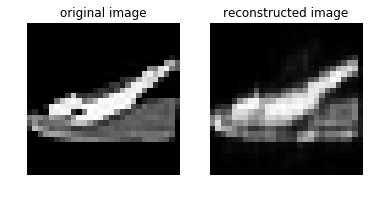

In [11]:
### TODO: Display some reconstructed images
### STRIP_START ###
X_pred = autoencoder.predict(X_test_flat)

idx = np.random.randint(X_test.shape[0])

plt.subplot(121)
plt.imshow(X_test[idx], cmap = plt.cm.gray)
plt.title('original image')
plt.axis('off')
plt.subplot(122)
plt.imshow(X_pred[idx].reshape(X_test.shape[1], X_test.shape[1]), cmap = plt.cm.gray)
plt.title('reconstructed image')
plt.axis('off')

### STRIP_END ###

We have defined below a function to add noise.

In [33]:
def add_noise(X_train, noise_factor=0.4):

    X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0*X_train.max(), size=X_train.shape) 
    X_train_noisy = np.clip(X_train_noisy, 0., 1.)

    return X_train_noisy

Use this function to create a noisy dataset of the test images. Display some noisy images.

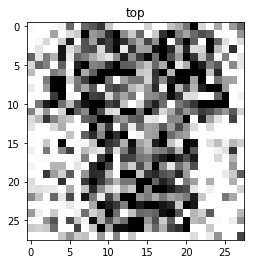

In [35]:
### TODO: Create a noisy dataset
### STRIP_START ###
X_test_noisy = add_noise(X_test)

idx = np.random.randint(X_test_noisy.shape[0])

plt.imshow(X_test_noisy[idx], cmap='gray_r')
plt.title(label_class[y_test[idx]])
plt.show()
### STRIP_END ###

If you used the default `noise_factor` parameter, you should barely distinguish the classes by eye.

Now try using your autoencoder: use the autoencoder with the noisy images as input.

In [36]:
### TODO: Use the autoencoder to denoise images
### STRIP_START ###
X_test_noisy_flat = X_test_noisy.reshape(X_test_noisy.shape[0], np.prod(X_test_noisy.shape[1:]))

denoised_images = autoencoder.predict(X_test_noisy_flat)
### STRIP_END ###

Now display side by side a noisy image and the denoised image.

(-0.5, 27.5, 27.5, -0.5)

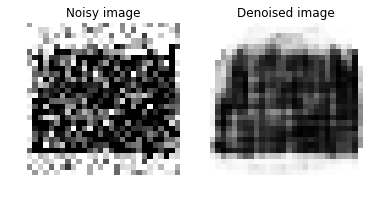

In [40]:
### TODO: Display side by side the noisy and denoised images
### STRIP_START ###
idx = np.random.randint(X_test_noisy_flat.shape[0])

plt.subplot(121)
plt.imshow(X_test_noisy[idx], cmap = 'gray_r')
plt.title('Noisy image')
plt.axis('off')
plt.subplot(122)
plt.imshow(denoised_images[idx].reshape(X_test_noisy.shape[1], X_test_noisy.shape[2]), cmap = 'gray_r')
plt.title('Denoised image')
plt.axis('off')
### STRIP_END ###

How did that work?

## Optional

You can get better results using CNN autoencoder instead of regular autoencoder.

If you have time, you can have a try. You might need to use the `UpSampling2D` layer.

In [69]:
### TODO: Redo the exercise with a CNN autoencoder
### STRIP_START ###
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
#x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
#x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
#x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
#x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='mse')
### STRIP_END ###

In [70]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

autoencoder.fit(X_train, X_train,
                epochs=10,
                batch_size=128,
                validation_data=(X_test, X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 49s 812us/sample - loss: 0.0329 - val_loss: 0.0220
Epoch 2/10
60000/60000 [==============================] - 49s 817us/sample - loss: 0.0188 - val_loss: 0.0166
Epoch 3/10
60000/60000 [==============================] - 48s 807us/sample - loss: 0.0157 - val_loss: 0.0145
Epoch 4/10
60000/60000 [==============================] - 49s 812us/sample - loss: 0.0142 - val_loss: 0.0138
Epoch 5/10
60000/60000 [==============================] - 49s 813us/sample - loss: 0.0133 - val_loss: 0.0135
Epoch 6/10
60000/60000 [==============================] - 49s 811us/sample - loss: 0.0126 - val_loss: 0.0121
Epoch 7/10
60000/60000 [==============================] - 49s 819us/sample - loss: 0.0121 - val_loss: 0.0124
Epoch 8/10
60000/60000 [==============================] - 49s 821us/sample - loss: 0.0117 - val_loss: 0.0113
Epoch 9/10
60000/60000 [==============================] - 49s 818us/sample - l

In [71]:
denoised_images = autoencoder.predict(X_test_noisy.reshape(X_test_noisy.shape[0], X_test_noisy.shape[1], X_test_noisy.shape[2], 1))

(-0.5, 27.5, 27.5, -0.5)

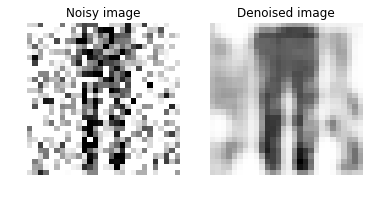

In [77]:
idx = np.random.randint(X_test_noisy_flat.shape[0])

plt.subplot(121)
plt.imshow(X_test_noisy[idx], cmap = 'gray_r')
plt.title('Noisy image')
plt.axis('off')
plt.subplot(122)
plt.imshow(denoised_images[idx].reshape(28, 28), cmap = 'gray_r')
plt.title('Denoised image')
plt.axis('off')